## Seoul Bike Sharing Demand
The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data = pd.read_csv("SeoulBikeData.csv", encoding = "latin1")

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
data.shape

(8760, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [6]:
data["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
data["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import plot_importance

from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)

In [9]:
len(data[data.duplicated()])

0

## Diagnosing the Data

In [10]:
def datainfo(table):
    info = pd.DataFrame(index = table.columns)
    info['DataType'] = table.dtypes
    info["Non-Null"] = table.count()
    info["Unique"] = table.nunique()
    info["NAN values"]= table.isnull().sum()
    return info

In [11]:
datainfo(data)

,DataType,Non-Null,Unique,NAN values
Date,object,8760,365,0
Rented Bike Count,int64,8760,2166,0
Hour,int64,8760,24,0
Temperature(°C),float64,8760,546,0
Humidity(%),int64,8760,90,0
Wind speed (m/s),float64,8760,65,0
Visibility (10m),int64,8760,1789,0
Dew point temperature(°C),float64,8760,556,0
Solar Radiation (MJ/m2),float64,8760,345,0
Rainfall(mm),float64,8760,61,0


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## Data Filtering

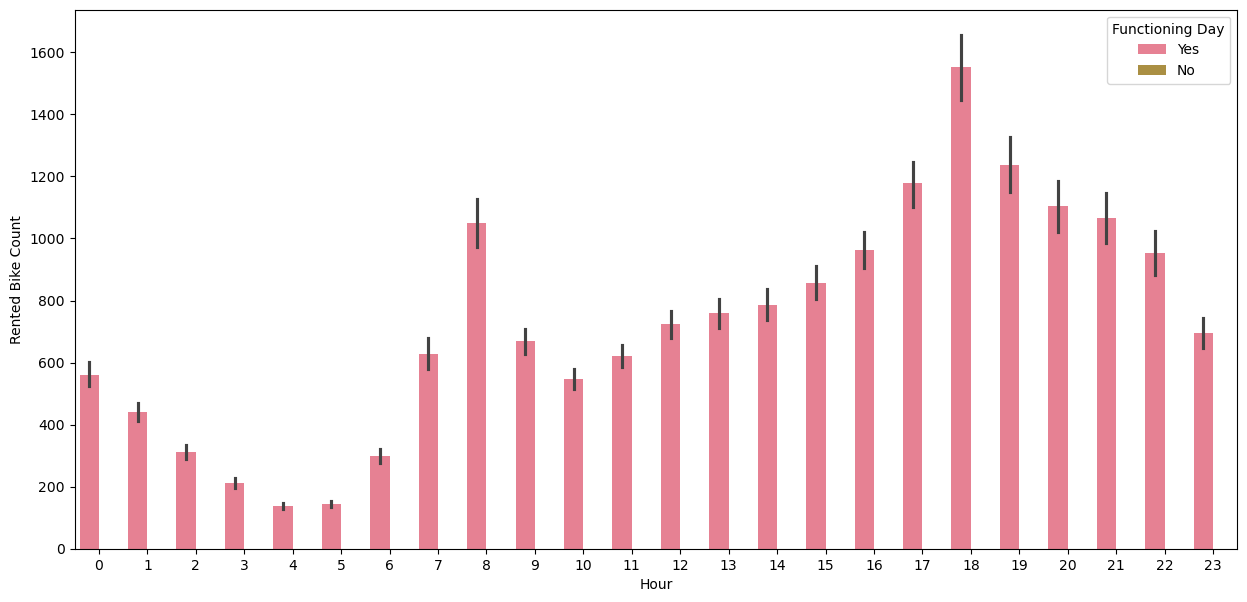

In [13]:
def barplots(x,y,hue):
    plt.figure(figsize = (15,7))
    sns.set_palette("husl")
    sns.barplot(x=x, y=y, hue=hue, data = data)
barplots("Hour", "Rented Bike Count", "Functioning Day")

In [14]:
data.groupby("Functioning Day").sum()["Rented Bike Count"].sort_values(ascending = False).reset_index()

,Functioning Day,Rented Bike Count
0,Yes,6172314
1,No,0


In [15]:
data.drop(data[data["Functioning Day"] == "No"].index, inplace = True)

In [16]:
data.drop("Functioning Day", axis = 1, inplace = True)

In [17]:
data.shape

(8465, 13)

## Separate Date, Month, Year from Date Column

In [18]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"]

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8465, dtype: datetime64[ns]

In [19]:
data["Day"] = data["Date"].dt.day
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.year

In [20]:
data.drop("Date", axis = 1, inplace = True)

## Exploratory Analysis and Visualization

<Axes: >

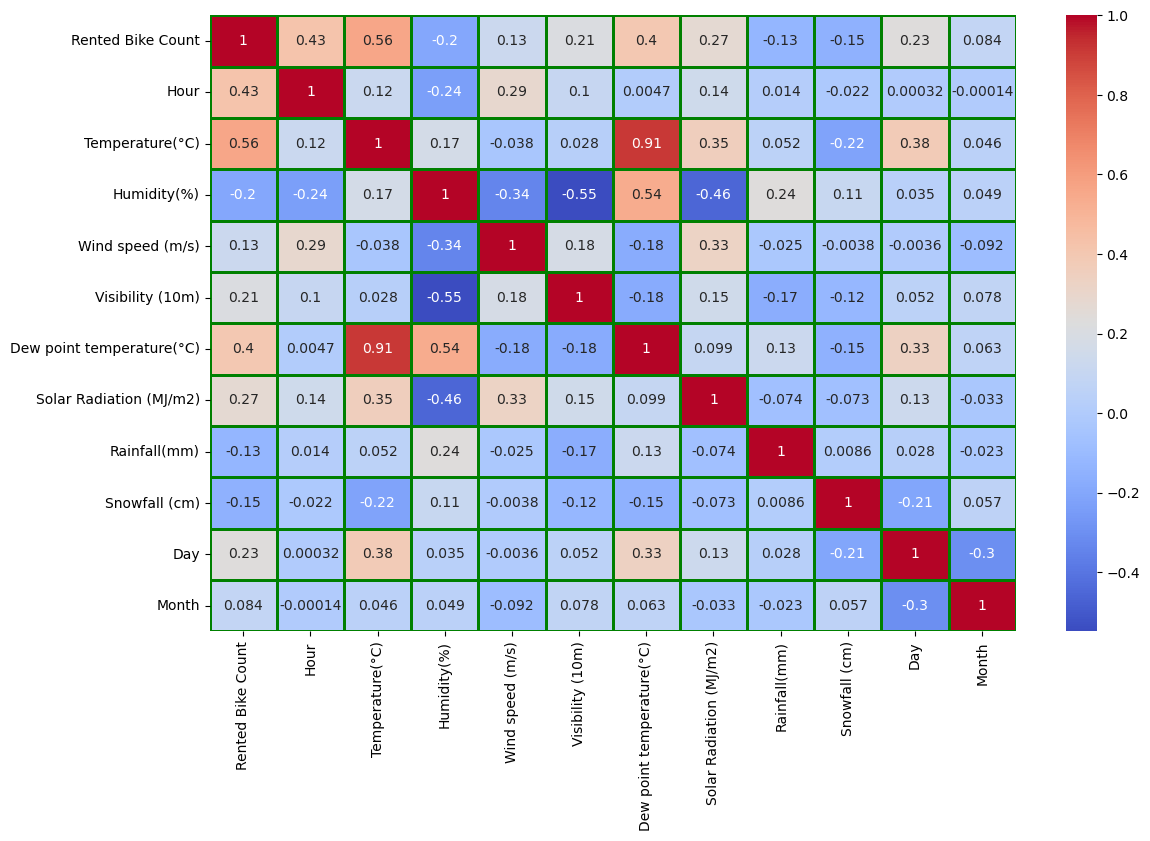

In [21]:
data_corr = data.corr()
plt.figure(figsize = (13,8))
sns.heatmap(data_corr, cmap = "coolwarm", annot = True, linecolor = "green", linewidths = 0.9)

In [22]:
data.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Day', 'Month'],
      dtype='object')

In [23]:
data.drop("Dew point temperature(°C)",axis = 1, inplace = True)

## Separate Numerical and Categorical Variables

In [24]:
num_features = [col for col in data.columns if data[col].dtype !='O']
num_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month']

In [25]:
num_data = data[num_features]
num_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Day,Month
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,2018,11
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,2018,11
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,2018,11
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,2018,11


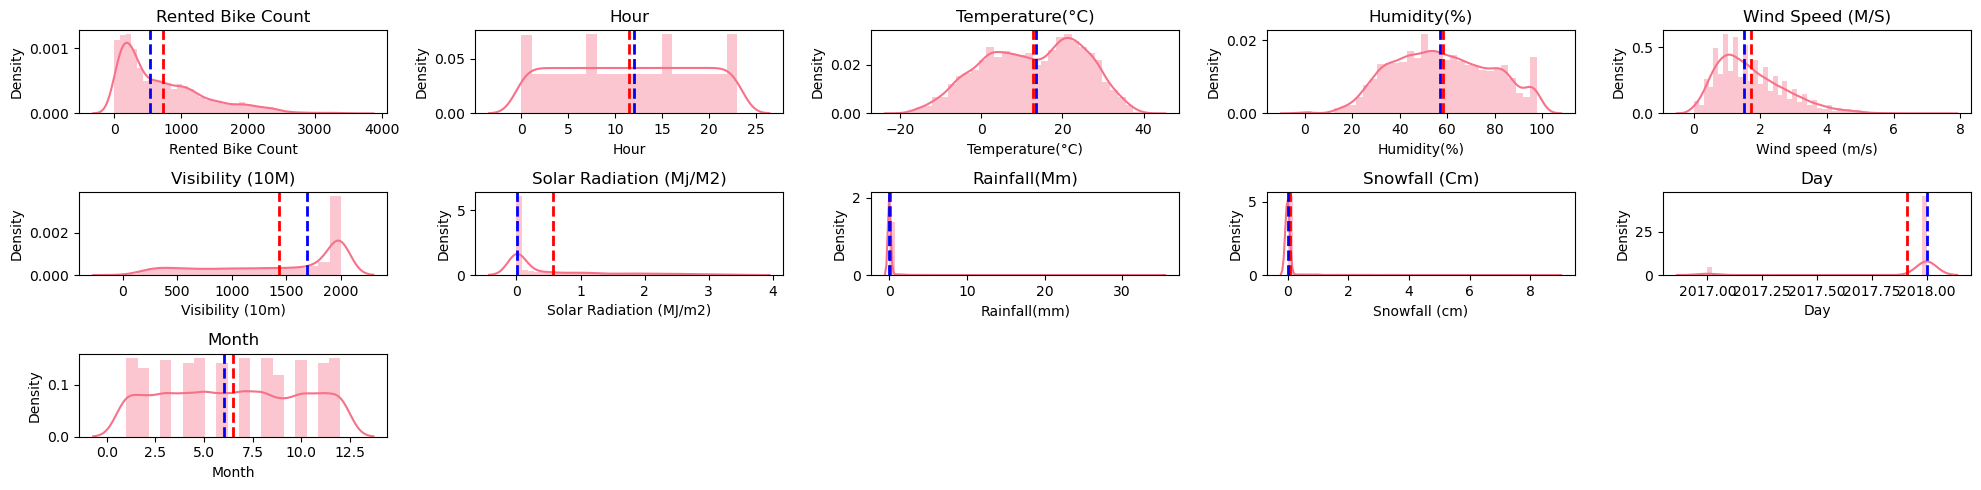

In [26]:
fig = plt.figure(figsize = (20,5))
for index, column in enumerate(num_features):
    plt.subplot(3,5, index+1)
    sns.distplot(data[column])
    feature = data[column]
    ax = fig.gca()
    ax.axvline(feature.mean(), color = "red", linestyle = "dashed", linewidth = 2)
    ax.axvline(feature.median(), color = "blue", linestyle = "dashed", linewidth = 2)
    plt.title(f'{column.title()}')
    plt.tight_layout()

In [27]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.139700,0.820305
Hour,-0.001261,-1.203446
Temperature(°C),-0.174550,-0.889578
Humidity(%),0.068649,-0.812228
Wind speed (m/s),0.894222,0.754256
Visibility (10m),-0.695306,-0.969125
Solar Radiation (MJ/m2),1.510065,1.145102
Rainfall(mm),14.616921,289.963779
Snowfall (cm),8.292830,90.542378
Day,-2.911538,6.478584


3


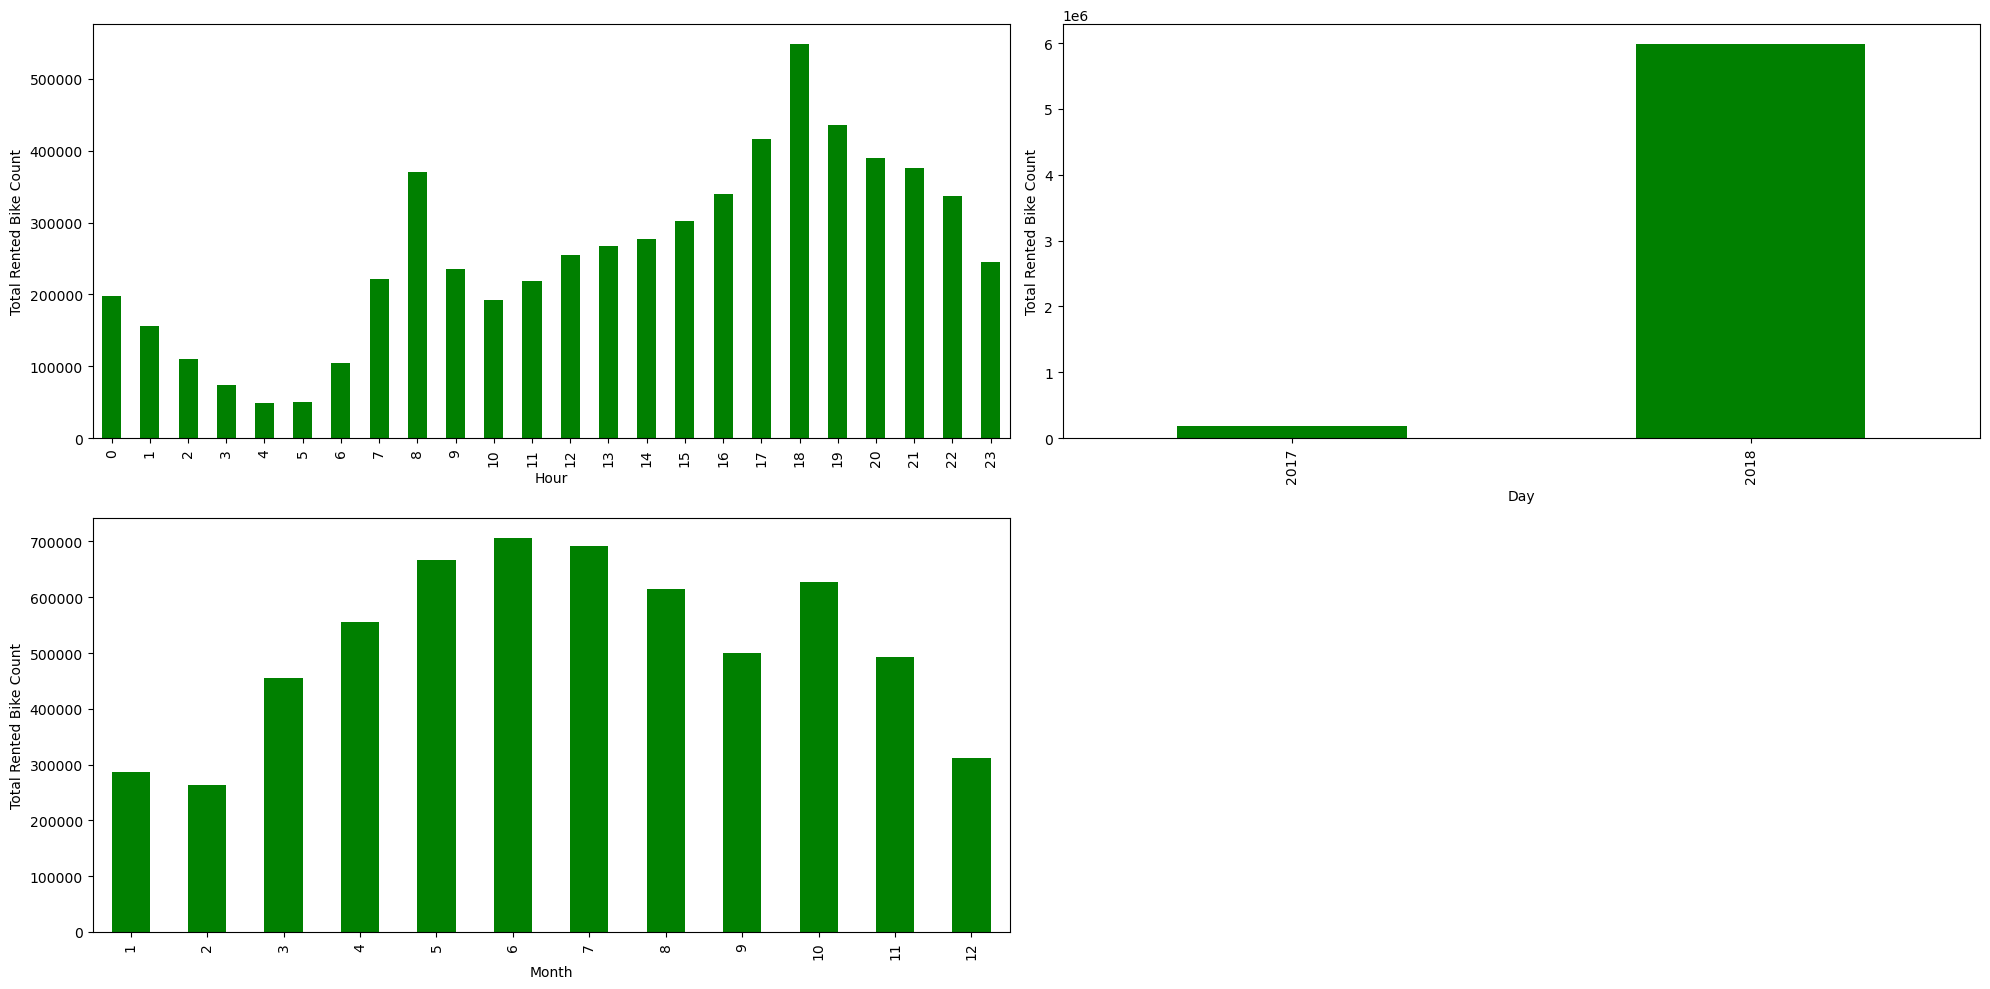

In [28]:
num_discrete_value = [feature for feature in num_features if len(data[feature].unique()) < 32]
print(len(num_discrete_value))
fig = plt.figure(figsize = (20,10))
for index, column in enumerate(num_discrete_value):
    plt.subplot(2,2,index+1)
    df = data.copy()
    feature = data[column]
    df.groupby(feature)['Rented Bike Count'].sum().plot(kind = 'bar', color = 'green')
    ax = fig.gca()
    plt.ylabel("Total Rented Bike Count")
    plt.tight_layout()

## Categorical Variables

In [30]:
cat_features = [col for col in data.columns if data[col].dtype == "O"]
cat_features

['Seasons', 'Holiday']

In [31]:
cat_df = data[cat_features]

In [33]:
print(len(cat_df[cat_features[0]].unique()), len(cat_df[cat_features[1]].unique()))

4 2


In [34]:
data.groupby("Seasons").sum()["Rented Bike Count"].sort_values(ascending = False).reset_index()

,Seasons,Rented Bike Count
0,Summer,2283234
1,Autumn,1790002
2,Spring,1611909
3,Winter,487169


In [35]:
data.groupby("Holiday").sum()["Rented Bike Count"].sort_values(ascending = False).reset_index()

,Holiday,Rented Bike Count
0,No Holiday,5956419
1,Holiday,215895


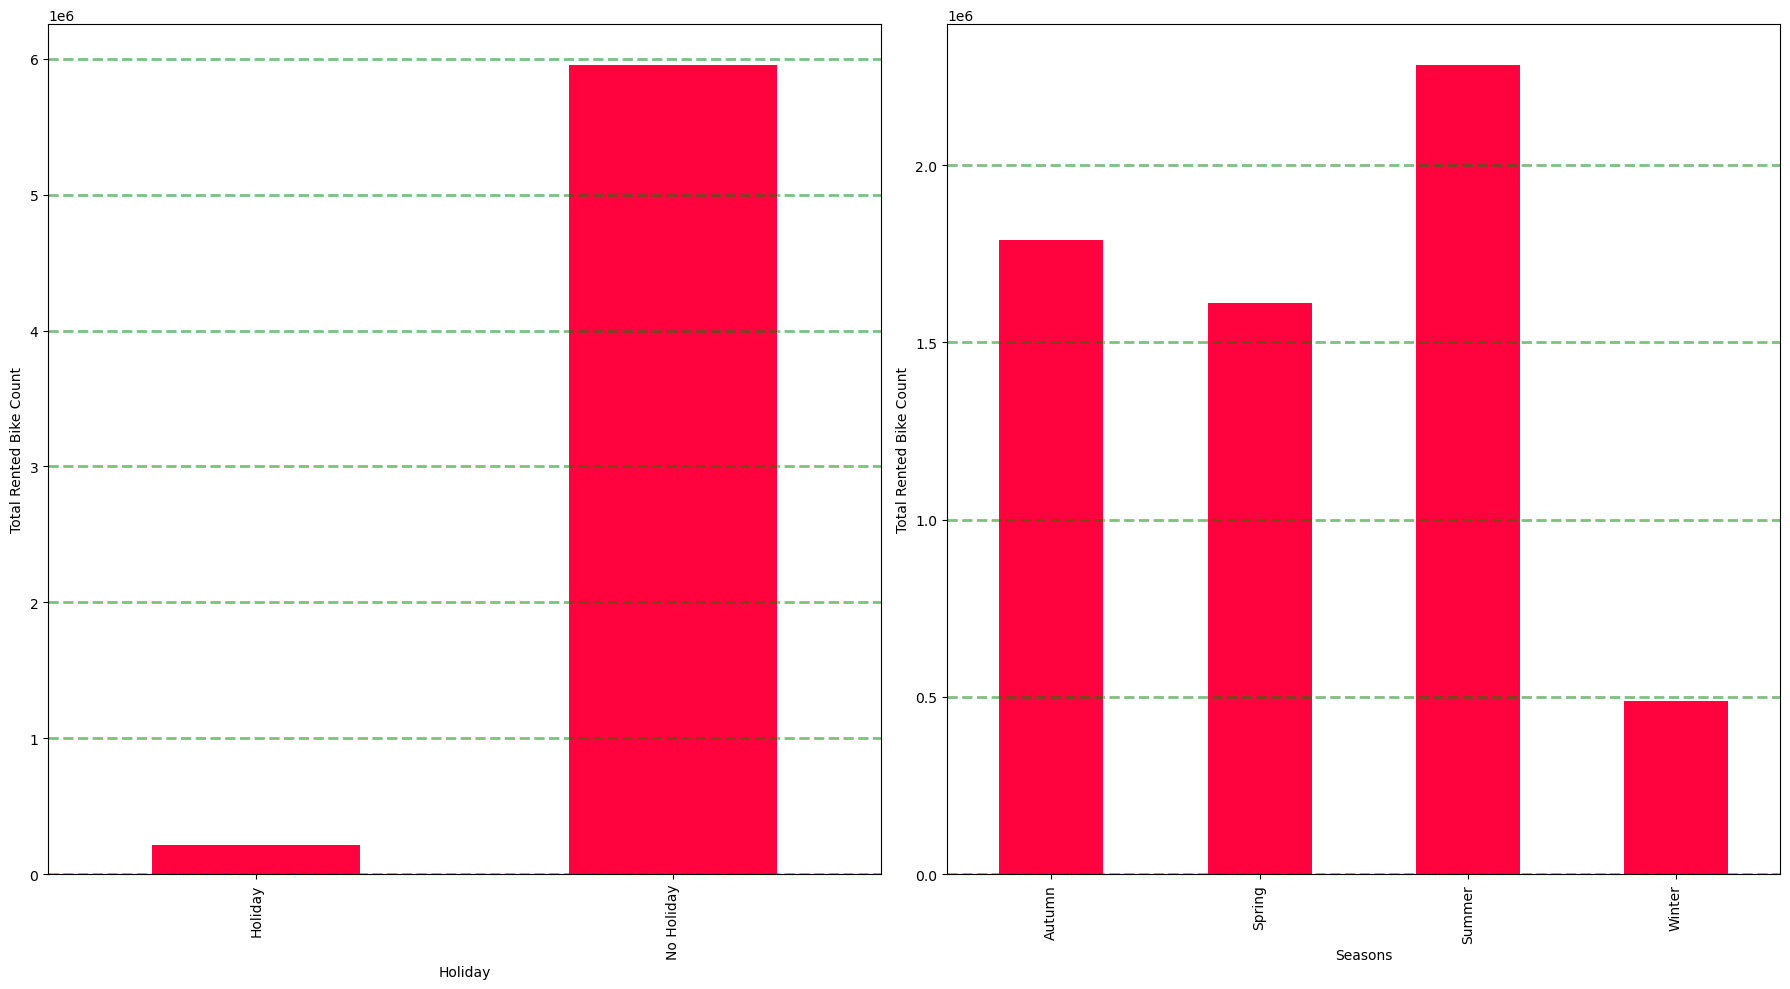

In [46]:
plt.figure(figsize = (18,10))
for index, column in enumerate(cat_features):
    plt.subplot(1,2, index+1)
    dataset = data.copy()
    dataset.groupby(feature)["Rented Bike Count"].sum().plot(kind = 'bar', color = "#ff033e")
    feature = data[column]
    plt.ylabel("Total Rented Bike Count")
    plt.tight_layout()
    plt.grid(color='green', linestyle='--', linewidth=2, axis='y', alpha=0.5)

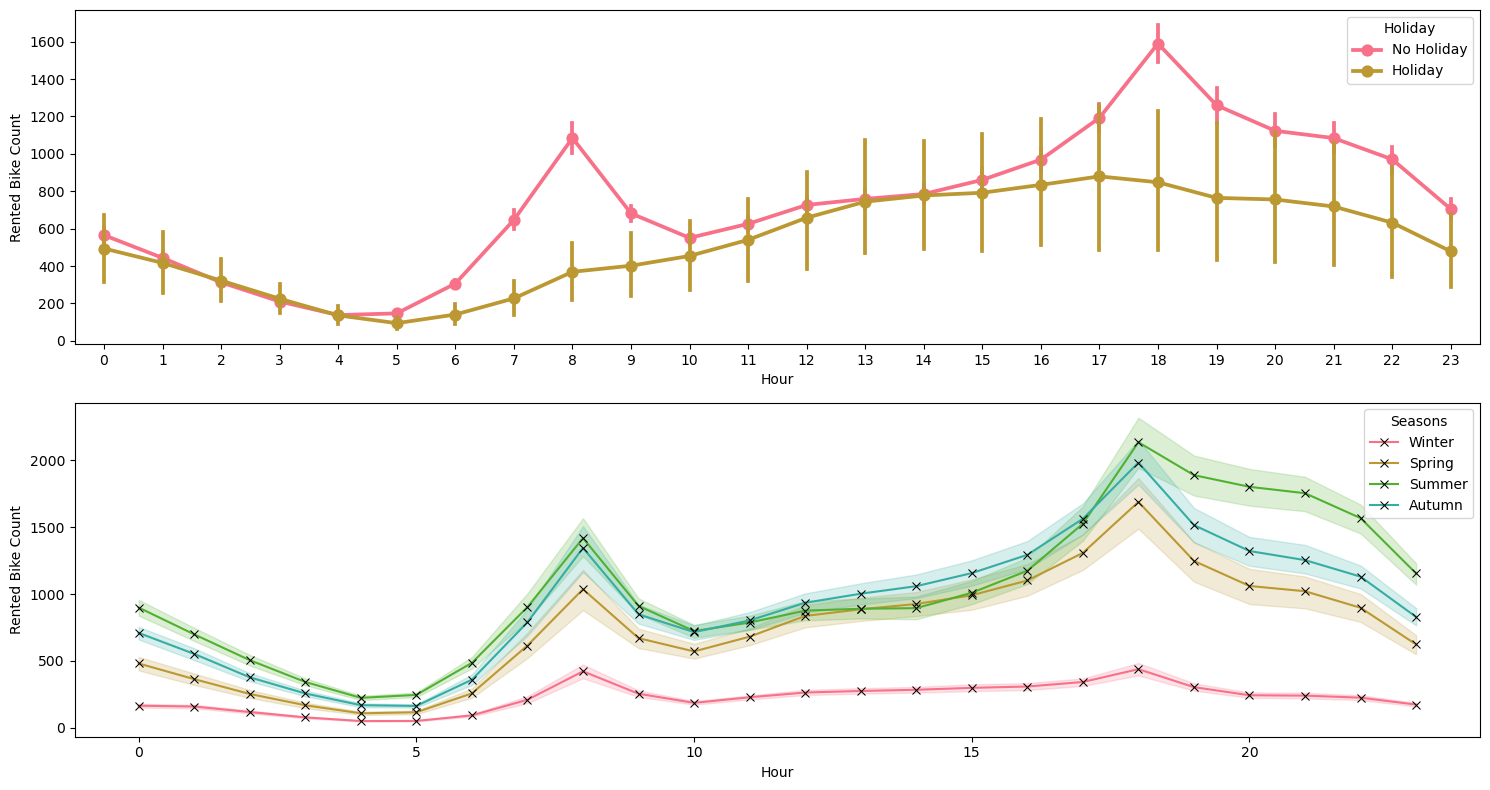

In [47]:
fig, axs = plt.subplots(nrows = 2, ncols =1, figsize = (15,8), dpi = 100)
sns.pointplot(data = dataset, x = "Hour", y = "Rented Bike Count", ax = axs[0], hue = "Holiday")
sns.lineplot(data=dataset, x="Hour", y="Rented Bike Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()

## Encoding Data

In [48]:
le_df = data.apply(LabelEncoder().fit_transform)


In [49]:
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month
0,252,0,111,28,22,1779,0,0,0,3,1,0,0
1,202,1,108,29,8,1779,0,0,0,3,1,0,0
2,171,2,103,30,10,1779,0,0,0,3,1,0,0
3,105,3,101,31,9,1779,0,0,0,3,1,0,0
4,76,4,103,27,23,1779,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,990,19,205,25,26,1673,0,0,0,0,1,1,10
8756,754,20,197,28,23,1779,0,0,0,0,1,1,10
8757,685,21,189,30,3,1747,0,0,0,0,1,1,10
8758,703,22,184,32,10,1639,0,0,0,0,1,1,10


In [53]:
data.groupby("Holiday").count()


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Day,Month
Holiday,,,,,,,,,,,,
Holiday,408,408,408,408,408,408,408,408,408,408,408,408
No Holiday,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057


In [54]:
le_df.groupby("Holiday").count()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Day,Month
Holiday,,,,,,,,,,,,
0,408,408,408,408,408,408,408,408,408,408,408,408
1,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057,8057


## Checking Distribution and Outlier

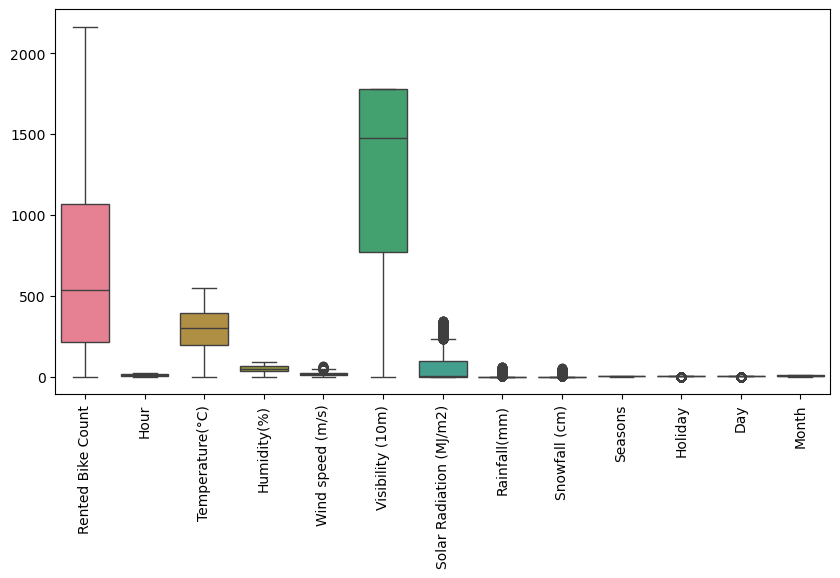

In [58]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90)
sns.boxplot(data = le_df)
plt.show()

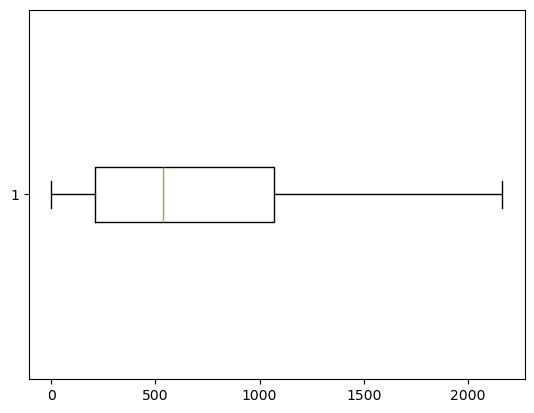

In [59]:
plt.boxplot(le_df["Rented Bike Count"], vert = False)
plt.show()

## Data Transformation

Text(0.5, 1.0, 'cube root')

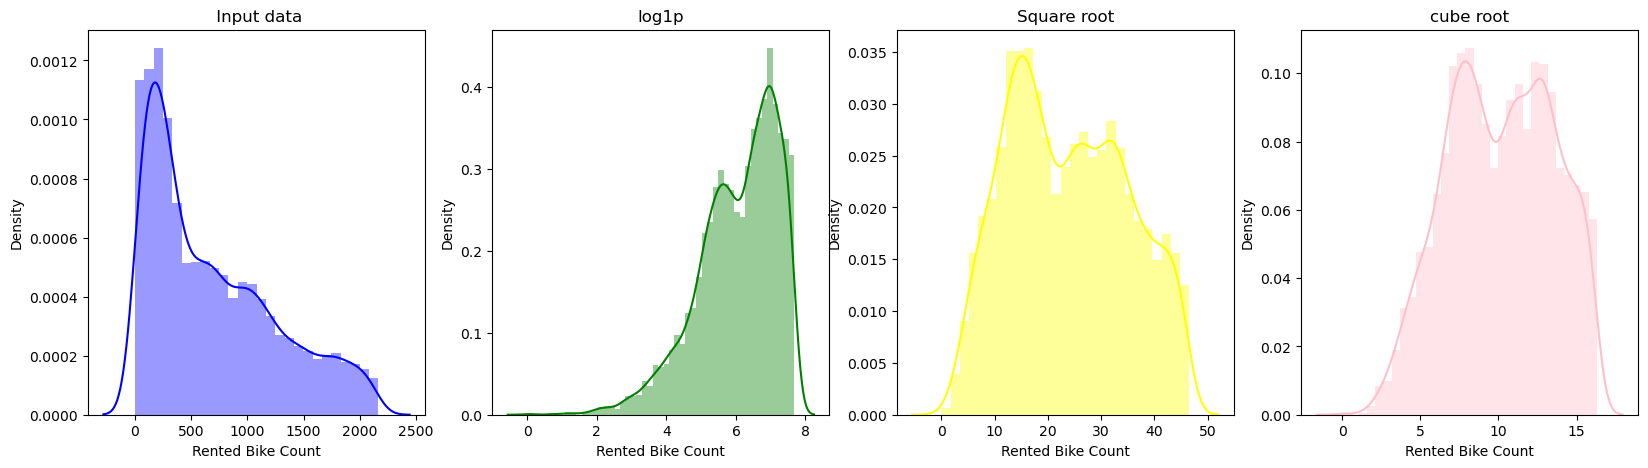

In [60]:
fig,axes = plt.subplots(1,4,figsize=(20,5))
sns.distplot((le_df['Rented Bike Count']),ax=axes[0],color='blue').set_title(" Input data")
sns.distplot(np.log1p(le_df['Rented Bike Count']+0.000000001),ax=axes[1],color='green').set_title("log1p")
sns.distplot(np.sqrt(le_df['Rented Bike Count']),ax=axes[2], color='yellow').set_title("Square root")
sns.distplot(np.cbrt(le_df['Rented Bike Count']*2),ax=axes[3], color='pink').set_title("cube root")

In [61]:
import scipy.stats as stats


In [64]:
def plotvariable(df, variable):
    plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    df[variable].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist = "norm", plot = plt)
    plt.show()

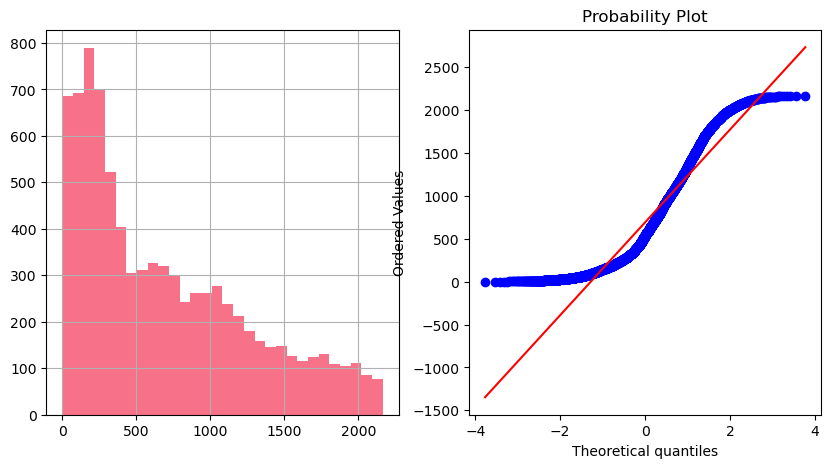

In [65]:
plotvariable(le_df, "Rented Bike Count")


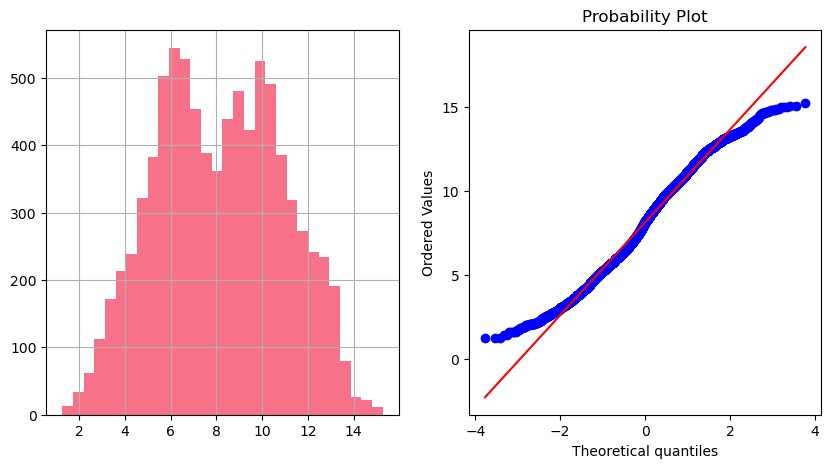

In [69]:
df["qb_conv"]=np.cbrt(data['Rented Bike Count'])

plotvariable(data,"qb_conv")


In [70]:
data.drop(columns = ["RBC_qb", "qb_conv"], inplace = True)

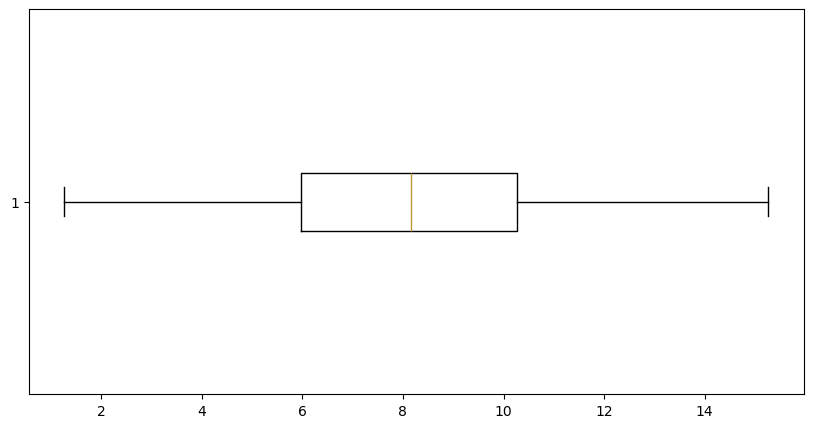

In [73]:
plt.figure(figsize = (10,5))
plt.boxplot(df["qb_conv"], vert = False)
plt.show()

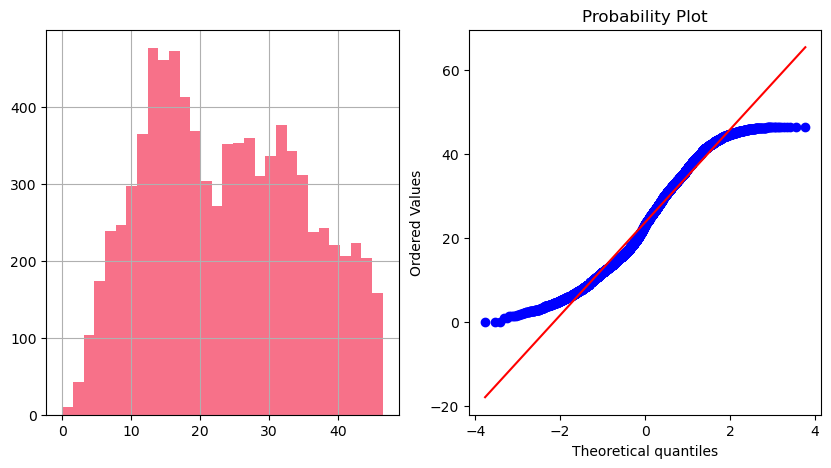

In [74]:
le_df['Rented Bike Count']=np.sqrt(le_df['Rented Bike Count'])

plotvariable(le_df,'Rented Bike Count')

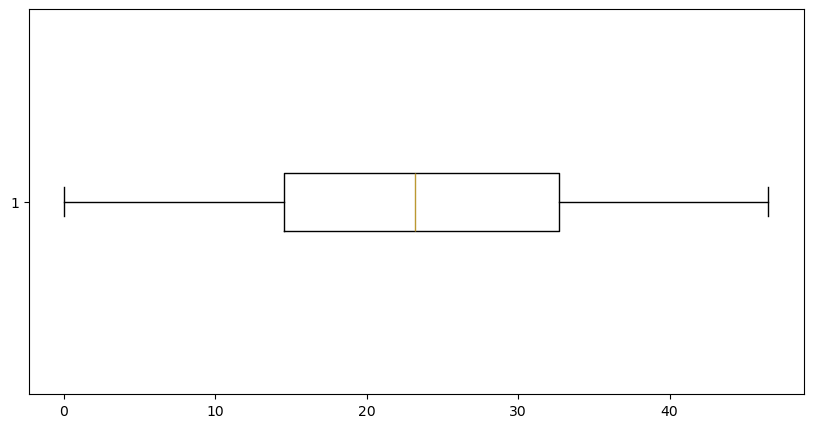

In [76]:
plt.figure(figsize=(10,5))
plt.boxplot(le_df["Rented Bike Count"],vert=False)
plt.show()

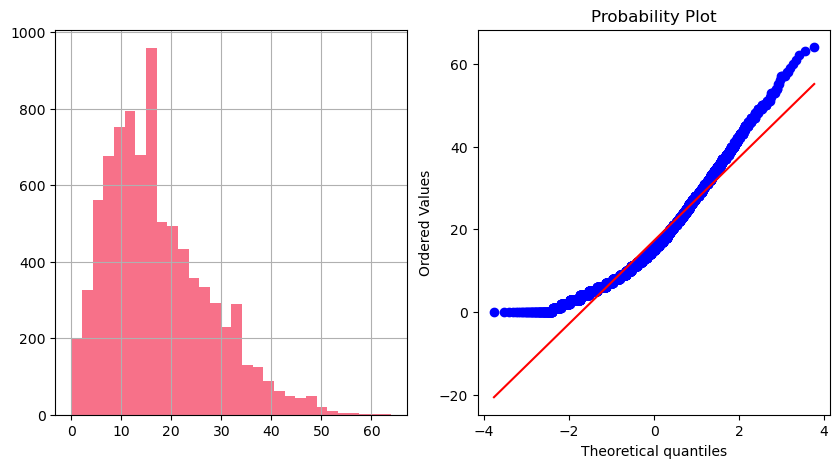

In [77]:
plotvariable(le_df,'Wind speed (m/s)')

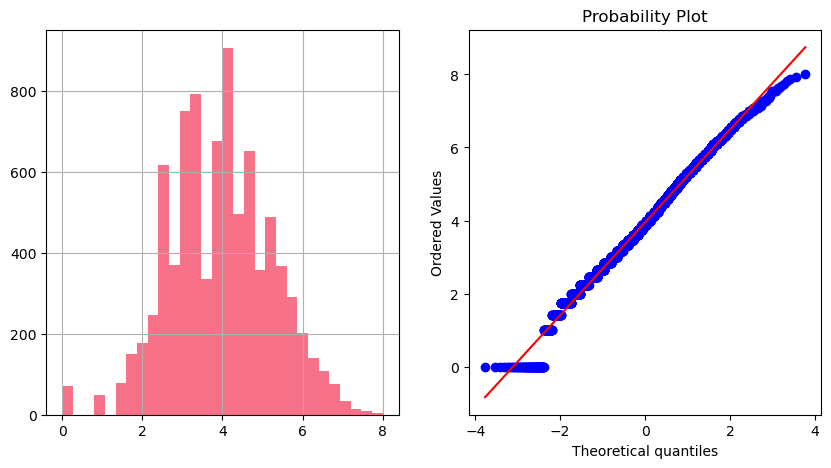

In [78]:
le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

plotvariable(le_df,'Wind speed (m/s)')

In [79]:
le_df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Day,Month
0,15.874508,0,111,28,4.690416,1779,0,0,0,3,1,0,0
1,14.212670,1,108,29,2.828427,1779,0,0,0,3,1,0,0
2,13.076697,2,103,30,3.162278,1779,0,0,0,3,1,0,0
3,10.246951,3,101,31,3.000000,1779,0,0,0,3,1,0,0
4,8.717798,4,103,27,4.795832,1779,0,0,0,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,31.464265,19,205,25,5.099020,1673,0,0,0,0,1,1,10
8756,27.459060,20,197,28,4.795832,1779,0,0,0,0,1,1,10
8757,26.172505,21,189,30,1.732051,1747,0,0,0,0,1,1,10
8758,26.514147,22,184,32,3.162278,1639,0,0,0,0,1,1,10


In [80]:
X = le_df.drop("Rented Bike Count", axis = 1)
Y = le_df["Rented Bike Count"]

## Splitting Data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [83]:
print(f"Shape of original data is {len(X)}")
print(f"Shape of splitted data is {len(X_train)} and {len(X_test)}")

Shape of original data is 8465
Shape of splitted data is 6772 and 1693


In [91]:
def predict(ml_model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    rob = RobustScaler()
    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)
    model = ml_model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_pred,Y_test, color = 'b')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    print(f"R^2 is {model.score(X_test, Y_test)}\n Adj R^2 is {1-(1-model.score(X_test, Y_test))*(len(Y_test)-1)/ (len(Y_test)-X_test.shape[1]-1)}\n RMSE is {mean_squared_error(Y_test, Y_pred, squared = False)}")

R^2 is 0.6584990509588858
 Adj R^2 is 0.656059758465735
 RMSE is 6.433962280045028


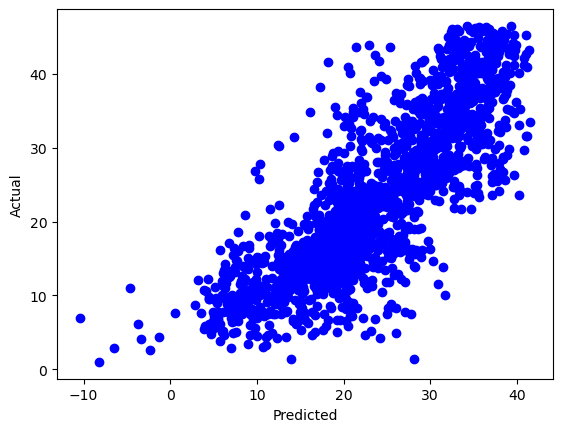

In [92]:
predict(LinearRegression(),X,Y)

R^2 is 0.7962781224644444
 Adj R^2 is 0.7948229661963333
 RMSE is 4.969370620098398


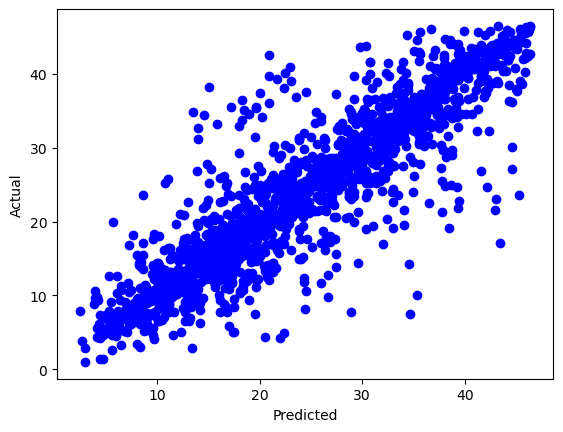

In [93]:
predict(DecisionTreeRegressor(), X, Y)

R^2 is 0.8862275501113343
 Adj R^2 is 0.8854148897549866
 RMSE is 3.713651176174257


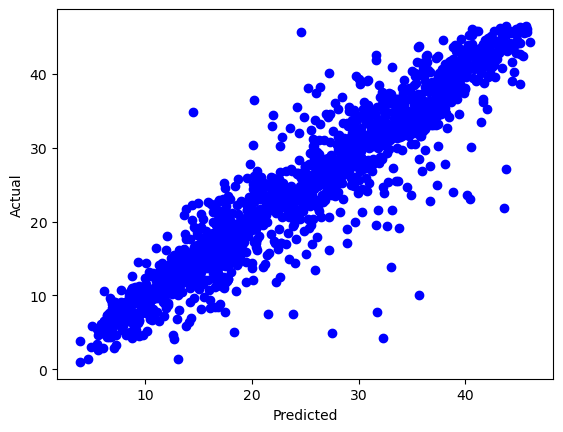

In [94]:
predict(RandomForestRegressor(), X,Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 999
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 12
[LightGBM] [Info] Start training from score 23.796232
R^2 is 0.891677155868822
 Adj R^2 is 0.890903421267885
 RMSE is 3.6236194339678707


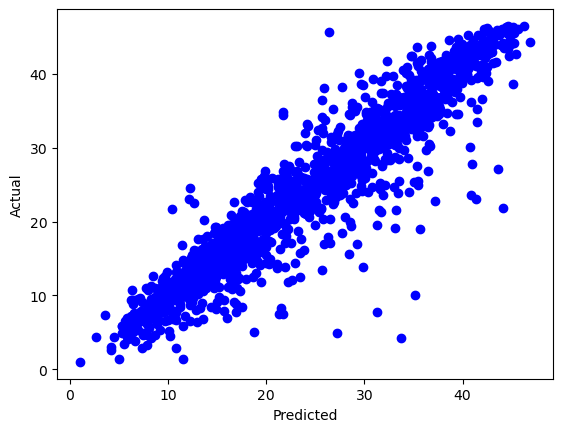

In [95]:
predict(LGBMRegressor(), X, Y)

## Accuracy Checking Using MinMaxScaler

In [97]:
def predict_mmsc(ml_model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    mm = MinMaxScaler()
    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)
    model = ml_model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_pred,Y_test, color = 'b')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    print(f"R^2 is {model.score(X_test, Y_test)}\n Adj R^2 is {1-(1-model.score(X_test, Y_test))*(len(Y_test)-1)/ (len(Y_test)-X_test.shape[1]-1)}\n RMSE is {mean_squared_error(Y_test, Y_pred, squared = False)}")

R^2 is 0.658499050958886
 Adj R^2 is 0.656059758465735
 RMSE is 6.4339622800450265


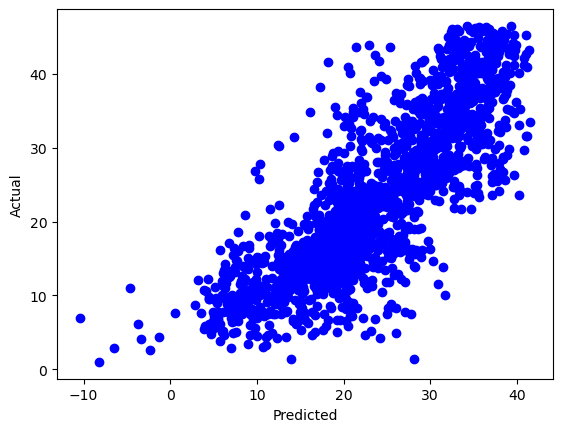

In [99]:
predict_mmsc(LinearRegression(),X,Y)

R^2 is 0.7835965858409009
 Adj R^2 is 0.7820508471683358
 RMSE is 5.121705551670397


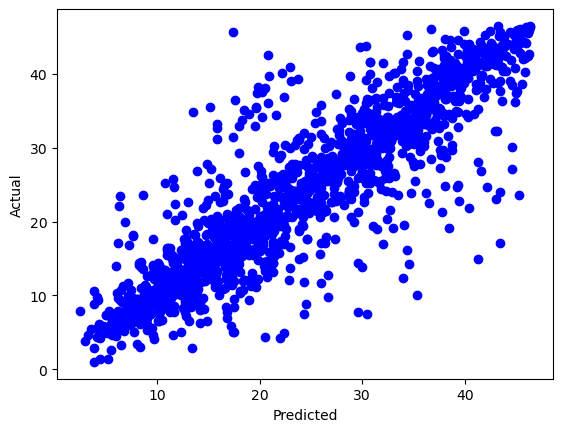

In [100]:
predict_mmsc(DecisionTreeRegressor(),X,Y)

R^2 is 0.8856847304070228
 Adj R^2 is 0.884868192767073
 RMSE is 3.7224997344464175


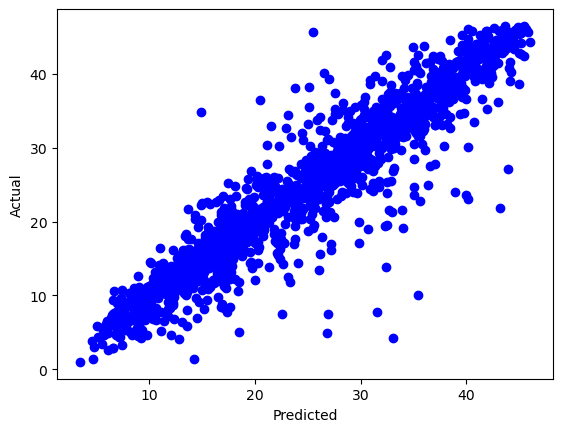

In [101]:
predict_mmsc(RandomForestRegressor(), X,Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 12
[LightGBM] [Info] Start training from score 23.796232
R^2 is 0.8921345419723576
 Adj R^2 is 0.8913640744150173
 RMSE is 3.6159610935279147


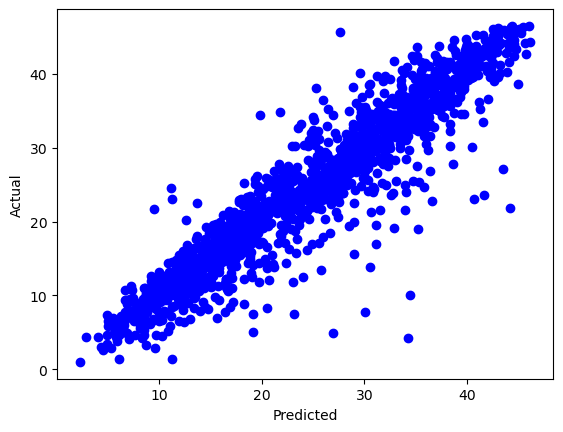

In [102]:
predict_mmsc(LGBMRegressor(), X, Y)

## Using StandardScaler 

In [109]:
def predict_sc(ml_model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    mm = StandardScaler()
    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)
    model = ml_model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    plt.scatter(Y_pred,Y_test, color = 'b')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    print(f"R^2 is {model.score(X_test, Y_test)}\n Adj R^2 is {1-(1-model.score(X_test, Y_test))*(len(Y_test)-1)/ (len(Y_test)-X_test.shape[1]-1)}\n RMSE is {mean_squared_error(Y_test, Y_pred, squared = False)}")
    pred_y_df = pd.DataFrame({"Actual Value":Y_test, "Predicted Value": Y_pred, "Difference": Y_test - Y_pred})
    print(pred_y_df[0:5])

R^2 is 0.6584990509588858
 Adj R^2 is 0.656059758465735
 RMSE is 6.433962280045028
      Actual Value  Predicted Value  Difference
5993     34.785054        39.600736   -4.815681
5340     30.838288        30.082604    0.755684
5951     30.479501        34.917309   -4.437808
879      19.261360        21.242595   -1.981235
6909     35.156792        38.824289   -3.667497


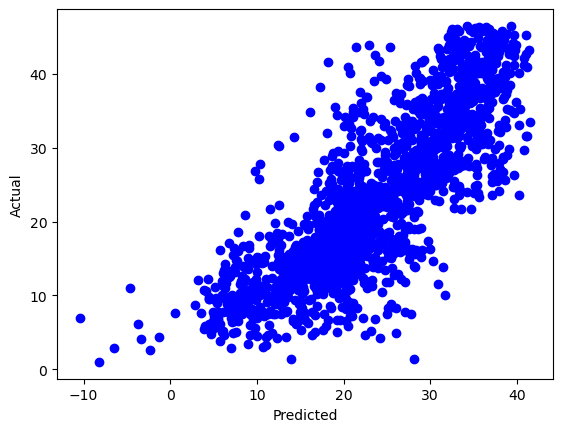

In [110]:
predict_sc(LinearRegression(), X, Y)

R^2 is 0.7921226474304329
 Adj R^2 is 0.7906378091977931
 RMSE is 5.019796848809944
      Actual Value  Predicted Value  Difference
5993     34.785054        38.353618   -3.568564
5340     30.838288        33.896903   -3.058615
5951     30.479501        35.312887   -4.833386
879      19.261360        16.340135    2.921226
6909     35.156792        41.267421   -6.110629


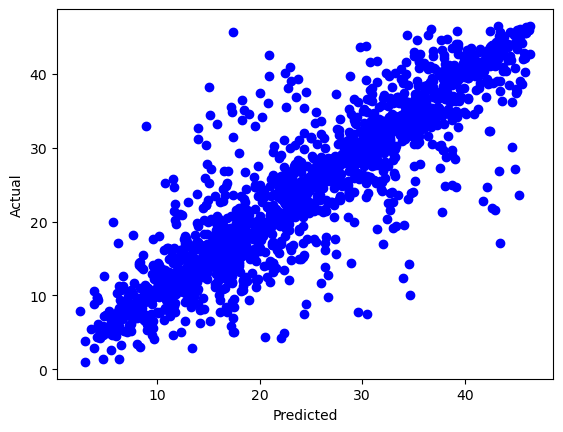

In [111]:
predict_sc(DecisionTreeRegressor(), X,Y)

R^2 is 0.8888249675576538
 Adj R^2 is 0.8880308601830657
 RMSE is 3.6710152228245967
      Actual Value  Predicted Value  Difference
5993     34.785054        35.890293   -1.105239
5340     30.838288        30.813906    0.024382
5951     30.479501        35.118838   -4.639336
879      19.261360        18.006593    1.254768
6909     35.156792        42.184665   -7.027874


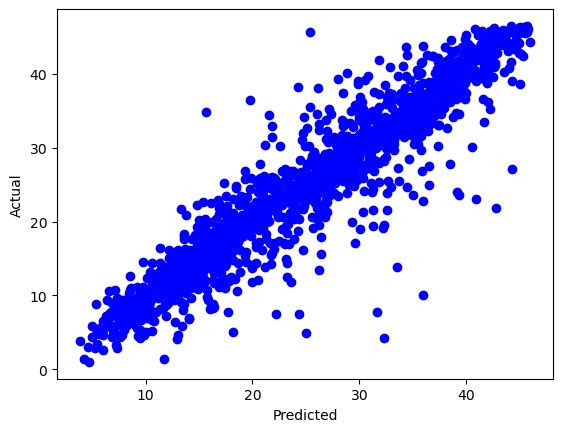

In [112]:
predict_sc(RandomForestRegressor(), X,Y)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1012
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 12
[LightGBM] [Info] Start training from score 23.796232
R^2 is 0.8929200397098394
 Adj R^2 is 0.8921551828506239
 RMSE is 3.6027709621146706
      Actual Value  Predicted Value  Difference
5993     34.785054        35.692083   -0.907029
5340     30.838288        30.388822    0.449466
5951     30.479501        32.809760   -2.330259
879      19.261360        17.875075    1.386285
6909     35.156792        41.273605   -6.116813


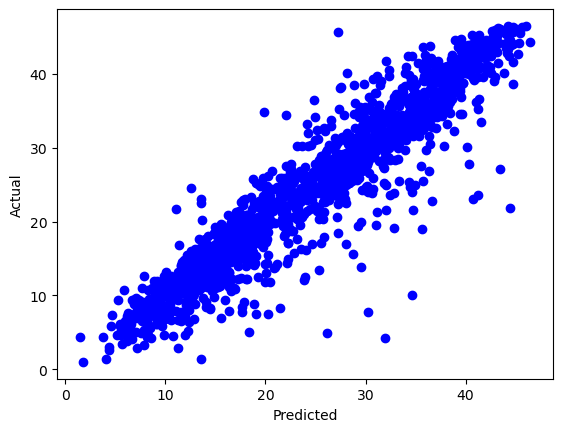

In [113]:
predict_sc(LGBMRegressor(), X,Y)

In [114]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


In [116]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=21, n_estimators=150,random_state=42)],
           ['MLPRegressor: ', MLPRegressor(  activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
]

In [118]:
model_data = []
for name, my_model in models:
    my_model_data = {}
    my_model.random_state = 24
    my_model_data["Name"] = name
    start = time.time()
    my_model.fit(X_train, Y_train)
    end = time.time()
    my_model_data["Train Time"] = end - start
    my_model_data["Train_R2_Score"] = metrics.r2_score(Y_train, my_model.predict(X_train))
    my_model_data["Test_R2_Score"] = metrics.r2_score(Y_test,my_model.predict(X_test))
    my_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(Y_test,my_model.predict(X_test)))
    model_data.append(my_model_data)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000425 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1008
[LightGBM] [Info] Number of data points in the train set: 6772, number of used features: 12
[LightGBM] [Info] Start training from score 23.796232


In [119]:
model_data

[{'Name': 'LinearRegression: ',
  'Train Time': 0.007187843322753906,
  'Train_R2_Score': 0.6478595677459096,
  'Test_R2_Score': 0.658499050958886,
  'Test_RMSE_Score': 6.4339622800450265},
 {'Name': 'Lasso: ',
  'Train Time': 0.06731200218200684,
  'Train_R2_Score': 0.6362247150339719,
  'Test_R2_Score': 0.6434832997542703,
  'Test_RMSE_Score': 6.573890897623658},
 {'Name': 'Ridge: ',
  'Train Time': 0.009404182434082031,
  'Train_R2_Score': 0.6478595233049247,
  'Test_R2_Score': 0.6584913774335546,
  'Test_RMSE_Score': 6.434034565195825},
 {'Name': 'KNeighborsRegressor: ',
  'Train Time': 0.006349802017211914,
  'Train_R2_Score': 0.7552774813694625,
  'Test_R2_Score': 0.6370973524527035,
  'Test_RMSE_Score': 6.632505538209321},
 {'Name': 'SVR:',
  'Train Time': 0.8926389217376709,
  'Train_R2_Score': 0.4573321812357769,
  'Test_R2_Score': 0.4653228350657165,
  'Test_RMSE_Score': 8.05060226809645},
 {'Name': 'DecisionTree ',
  'Train Time': 0.030289173126220703,
  'Train_R2_Score': 1.

In [120]:
df_model_pred = pd.DataFrame(model_data)

In [121]:
df_model_pred

,Name,Train Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,0.007188,0.647860,0.658499,6.433962
1,Lasso:,0.067312,0.636225,0.643483,6.573891
2,Ridge:,0.009404,0.647860,0.658491,6.434035
3,KNeighborsRegressor:,0.006350,0.755277,0.637097,6.632506
4,SVR:,0.892639,0.457332,0.465323,8.050602
5,DecisionTree,0.030289,1.000000,0.796818,4.962784
6,RandomForest,1.867252,0.984941,0.887012,3.700824
7,ExtraTreeRegressor :,0.967817,1.000000,0.892900,3.603110
8,GradientBoostingRegressor:,0.535900,0.886020,0.869613,3.975575
9,XGBRegressor:,0.080190,0.975358,0.896104,3.548808


## Conclusion

In the Bike Sharing Demand project, we successfully developed and trained a predictive model to estimate the number of bike rentals based on various features such as weather conditions, time of day, and seasonal factors. Through rigorous data preprocessing, feature engineering, and model selection, we were able to capture the underlying patterns and trends that influence bike-sharing demand.

Our final model demonstrated strong predictive performance, as evidenced by its ability to generalize well to unseen data, achieving 89.61% accuracy score on the test set and 97.5% on the training set. We explored different types of regression models, including linear regression, decision trees, and ensemble methods, ultimately selecting XGBRegressor or Light-GBM due to its superior accuracy and ability to handle the complexity of the dataset.